<a href="https://colab.research.google.com/github/sylviayanz/2023-Predictive-Analytics/blob/main/Final_Project_Apple_Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [1]:
import itertools
import pandas as pd
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

# nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords,wordnet
from nltk import NaiveBayesClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from keras.models import load_model

# tokenize the dataset corpus, delete uncommon words such as names.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from IPython.display import display, HTML
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, accuracy_score, f1_score,recall_score, roc_auc_score,precision_recall_curve, average_precision_score, auc, roc_curve
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import classification_report

from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pickle

sns.set()

In [2]:
#NLTK (Natural Language Toolkit): a popular Python library for working with human language data

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') #WordNet corpus, which is a large lexical database of English nouns, verbs, adjectives, and adverbs.
nltk.download('omw-1.4') #Open Multilingual WordNet (OMW) 1.4 corpus.

#NLTK provides access to a wide array of linguistic data, such as word corpora, lexical resources, grammars,
#and trained models for tasks like tokenization, stemming, tagging, parsing, and more.
#These resources are not automatically included when we install NLTK,
#so we have to download them separately based on our needs.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#Task 3: Load the Data

In [3]:
data = pd.read_csv ('/content/drive/MyDrive/LaGuardia Class/assignment/Apple-Twitter-Sentiment-DFE - Apple-Twitter-Sentiment-DFE.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [4]:
#get first 10 rows
data.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
5,623495518,True,golden,13,NaN,3,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://...
7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected?...
8,623495521,True,golden,15,NaN,3,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know ...
9,623495522,False,finalized,3,12/12/14 0:52,3,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The W...


##Get Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [6]:
data.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


Until here, I know this is a dataset of Twitter post with sentiment info, I want to focus on the column 'sentiment', but not sure what those numbers mean, so let's take a look!

In [7]:
#sentiment is my target variable, let's count the values

data['sentiment'].value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

In [8]:
#Then I checked what 'sentiment'=1 look like with text column

data[data['sentiment'] == '1'][['sentiment', 'text']]

,sentiment,text
10,1,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
14,1,@apple Contact sync between Yosemite and iOS8 ...
16,1,WARNING IF YOU BUY AN IPHONE 5S UNLOCKED FROM ...
23,1,"@Apple, For the love of GAWD, CENTER the '1'on..."
24,1,i get the storage almost full notification lit...
...,...,...
3855,1,RT @Ecofantasy: Thinking of upgrading to #Yose...
3857,1,why isnt group facetime a thing @apple wtf
3877,1,Being held hostage at @apple - They are replac...
3880,1,hey @apple is it normal for my laptop charger ...


In [9]:
#'sentiment'=3

data[data['sentiment'] == '3'][['sentiment', 'text']]

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL
...,...,...
3874,3,Apple Is Warming Up To Social Media: Apple is ...
3875,3,Apple Is Warming Up To Social Media: Apple is ...
3876,3,Apple Is Warming Up To Social Media: Apple is ...
3881,3,(Via FC) Apple Is Warming Up To Social Media -...


In [10]:
#'sentiment'=5

data[data['sentiment'] == '5'][['sentiment', 'text']]

,sentiment,text
6,5,Top 3 all @Apple #tablets. Damn right! http://...
7,5,CNBCTV: #Apple's margins better than expected?...
13,5,RT @peterpham: Bought my @AugustSmartLock at t...
28,5,Latest Apple Products Leading in Efficiency ht...
33,5,RT @saxonidubom: @rwang0 @Apple Thanks...think...
...,...,...
3840,5,Lets go shopping!!! @apple http://t.co/uTFUHuoJIi
3868,5,Apple Is Warming Up To Social Media: Apple is ...
3878,5,RT @shannonmmiller: Love the @Apple is support...
3883,5,@marcbulandr I could not agree more. Between @...


It looks like for sentiment column, 1 means negative and 5 means positive, 3 means neutral.

ref: https://huggingface.co/blog/sentiment-analysis-twitter


##Find Missing Values

In [11]:
# How many texts we have
print('There are', data.shape[0], 'text')

# check for duplicates
print("There are", len(data[data.duplicated()]), "duplicates")

# check if we have missing values
print("There are", data.isnull().sum().sum(), "missing values")

There are 3886 text
There are 0 duplicates
There are 3886 missing values


In [12]:
#Let's see which columns have missing values
data.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

<Axes: >

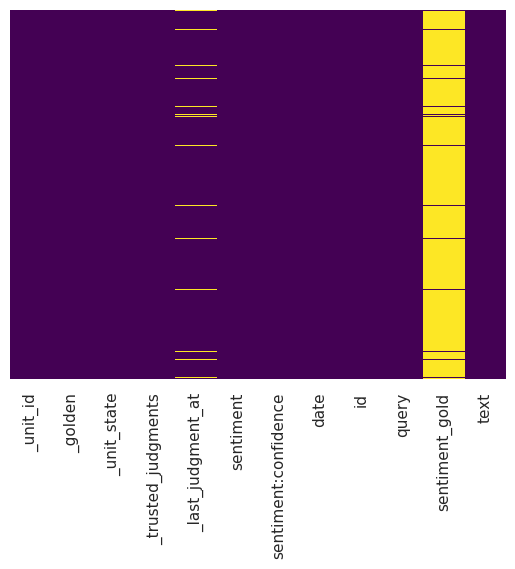

In [13]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

After a thorough examination of our dataset consisting of 3886 rows, it has come to our attention that the column 'sentiment_gold' contains 3783 missing values, which accounts for nearly all entries in this column. In consideration of the substantial absence of data in this particular column, it is deemed prudent to proceed by removing the 'sentiment_gold' column from the dataset to ensure the integrity and reliability of our analysis.

#Task 5: Perform Data Cleaning

In [14]:
#drop column sentiment_gold

data = data.drop(['sentiment_gold'], axis=1)

In [15]:
# For column 'sentiment, it has been identified that there exist 82 instances labeled as 'not_relevant.'
#As 'sentiment' will be the target variable, for ensuring that the model is trained on more relevant and
#significant data points, let's remove the rows associated with this label.
data = data[data['sentiment'] != 'not_relevant']

In [16]:
data['sentiment'].value_counts()

3    2162
1    1219
5     423
Name: sentiment, dtype: int64

<Axes: >

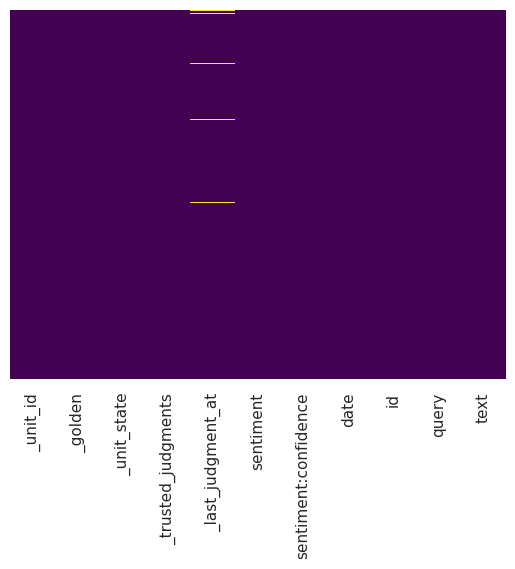

In [17]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#there're still some missing values on column "_last_judgment_at", let's ignore it first

#Task 6: Visualize Cleaned up Dataset

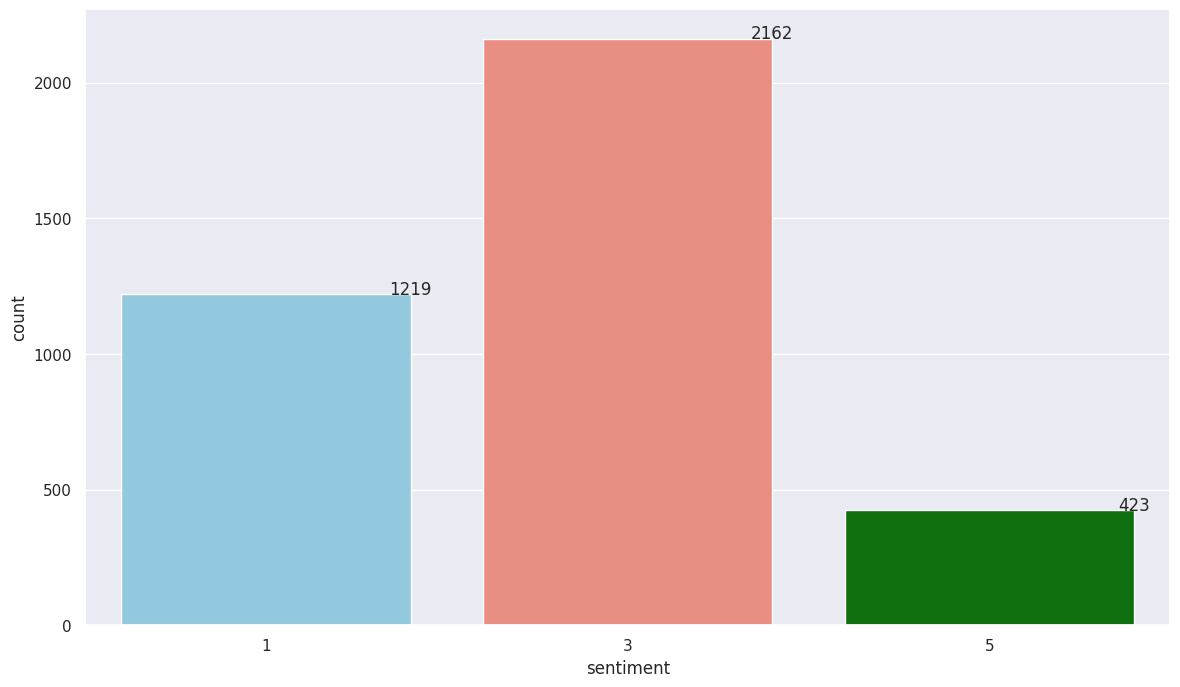

In [18]:
#create a count plot to see the values number for column sentiment
plt.figure(figsize=(14, 8))

order = ['1', '3', '5']
colors = ['skyblue', 'salmon', 'green']

ax = sns.countplot(x= "sentiment", data = data, order = order, palette = colors)

# Calculate the total count
total = float(len(data))

# Annotate the plot with percentage
for p in ax.patches:
    count = round(p.get_height())  # Get the count for each bar
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center')

plt.show()

#color ref: https://matplotlib.org/stable/users/explain/colors/colors.html

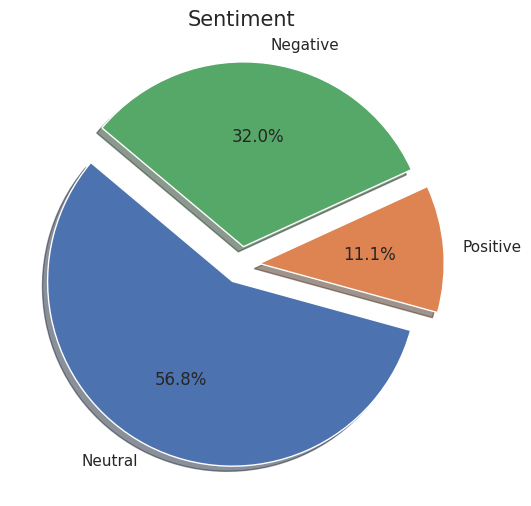

In [19]:
#create a pie chart to see the percentage of Sentiment

plt.figure(figsize=(6, 6))
explode = (0.1, 0.1, 0.1)  # Equal length to the number of sentiment categories
plt.pie([2162, 423, 1219], explode=explode, labels=['Neutral', 'Positive', 'Negative'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment', fontsize=15)
plt.axis('off');
plt.show()


In [20]:
# create an array called categories, it will have binary values (0 or 1) based on the 'sentiment' column.
#if 'sentiment' column is '1' than '0', else 1
categories = pd.DataFrame(data['sentiment'].apply(lambda x: 0 if x == '1' else 1)).to_numpy()
categories
#0-->negative, 1-->positive and neutral

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [21]:
data['sentiment'].value_counts()

3    2162
1    1219
5     423
Name: sentiment, dtype: int64

In [22]:
#i don't want to mess up numbers with 'sentiment' and 'categories', so I mapping the sentiment column to negative, positive and neutral

# Mapping sentiment values
sentiment_mapping = {'1': 'negative', '3': 'neutral', '5': 'positive'}

# Replace sentiment values based on the mapping
data['sentiment'] = data['sentiment'].replace(sentiment_mapping)


In [23]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,text
0,623495513,True,golden,10,NaN,positive,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,positive,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,positive,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,positive,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,positive,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,Nobody expects the Spanish Inquisition #AAPL


#Task 7: Conceptualize the problem

In [24]:
# For NLP we will keep only the necessary columns such as "text" and "sentiment" columns and we will drop the rest
data.drop(["_unit_id", "_golden", "_unit_state", "_trusted_judgments", "_last_judgment_at","sentiment:confidence","date", "id","query"], axis = 1, inplace = True)

In [25]:
data.head()

,sentiment,text
0,positive,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,positive,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,positive,My cat only chews @apple cords. Such an #Apple...
3,positive,I agree with @jimcramer that the #IndividualIn...
4,positive,Nobody expects the Spanish Inquisition #AAPL


In [26]:
# create lemmatizer
lemmatizer = WordNetLemmatizer()

In [27]:
#to simplify Part-of-Speech (POS) tags for words to be used in lemmatization
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else: #If none of the above conditions are met, it defaults to wordnet.NOUN (treating the word as a noun).
        return wordnet.NOUN

#'N' (nouns) , 'J' (adjectives),  'V' (verbs),  'R' (adverbs)

In [72]:
#clean text

def clean_texts(text):
    clean_words = []

    # Remove email addresses patterns
    raw_text = re.sub(r'\b[\w\-.]+?@\w+?\w+?\.\w{2,4}\b'," ", text)

    # Remove URLs patterns
    raw_text = re.sub("[^a-zA-Z]"," ", raw_text)
    raw_text = re.sub(r'http\S+', '', raw_text)

    # Remove numbers
    raw_text = re.sub(r"\d+(\.\d+)?"," ", raw_text)

    # Remove hashtags
    raw_text = re.sub(r'#\w+', '', raw_text)

    # Remove mentions (@username)
    raw_text = re.sub(r'@\w+','', raw_text)

    # Remove Retweet indicators (RT)
    raw_text = re.sub(r'\bRT\b', '', raw_text)

    # Remove special characters and punctuation (keeping only letters)
    raw_text = re.sub(r"[^a-zA-Z]", " ", raw_text)


    stop_words = set(stopwords.words("english"))
    words_tokens = nltk.word_tokenize(raw_text)

    #Remove some high-frequency words that might be irrelevant and could potentially distract the model during training
    remove_words = ['apple', 'co', 'http', 'aapl']
    stop_words.update(remove_words)

    for word in words_tokens:
        if word.lower() not in stop_words:
            pos = pos_tag([word])  # get the part of speech of each word
            clean_word = (lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
            clean_words.append("".join(clean_word))

    return (" ".join(clean_words))

In [74]:
# Store the cleaned text inside clean_texts_corpus array
clean_texts_corpus = []

for text in data["text"]:
    clean_texts_corpus.append(clean_texts(text))

In [75]:
data["text"] = data["text"].apply(clean_texts)
data["text"].head()

0                  best steve job email ever g
1    jpdesloges stock mini flash crash today e
2                                     cat cord
3         agree jimcramer trade today good see
4                                       expect
Name: text, dtype: object

In [76]:
data.head()

,sentiment,text
0,positive,best steve job email ever g
1,positive,jpdesloges stock mini flash crash today e
2,positive,cat cord
3,positive,agree jimcramer trade today good see
4,positive,expect


In [77]:
print("text 5 cleaned {",data["text"][5],"}")

text 5 cleaned { stock buy december gain }


In [78]:
#finding and categorizing words from "text" based on their frequency

words_values = pd.Series(" ".join(data["text"]).split()).value_counts()
print(words_values)
rare_words = words_values[words_values <= 3] #identify rare words that occur three times or less
print(rare_words)
print(rare_words.value_counts())

need           433
one            389
computer       355
onerepublic    354
battery        353
              ... 
owner            4
secretly         4
dr               4
carrier          4
swift            4
Length: 1411, dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)


In [79]:
#filter out rare words

data["text"] = data["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
data["text"].head()

0                  best steve job email ever g
1    jpdesloges stock mini flash crash today e
2                                     cat cord
3         agree jimcramer trade today good see
4                                       expect
Name: text, dtype: object

In [80]:
# Create function to display wordcloud
#generates and displays a word cloud based on the input data using Python's WordCloud library along with matplotlib.
def create_WordCloud(data, back_ground_color = "black", title = None):
  wordcloud = WordCloud(background_color=back_ground_color, max_words=300, max_font_size=30 , scale=3,random_state=1).generate(str(data))
  mpl.rcParams['figure.figsize']=(15,15)
  mpl.rcParams['font.size']=20
  #plt.style.use('fast')
  fig = plt.figure(1)
  if title:
    plt.title(title, fontsize= 30)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 3885
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3804 non-null   object
 1   text       3804 non-null   object
dtypes: object(2)
memory usage: 218.2+ KB


In [82]:
## seprate the positive and negative words based on categories
Negative_words = [] #categories = 0
Positive_words = [] #categories = 1, including neutral words

for index, num in enumerate(categories):
    if num == 0:
        Negative_words.append(data["text"].iloc[index])
    else:
        Positive_words.append(data["text"].iloc[index])

#.iloc retrieves the text at the exact index position
#ref: https://www.tensorscience.com/posts/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products.html

If I don't use .iloc, it shows error, not sure why.

In [83]:
Negative_words[:20]

['wtf battery one second ago wtf',
 'contact sync yosemite io seriously screw use much past icloud',
 'buy use verizon network',
 'love center damn calendar app fix back center',
 'get storage almost full notification literally every minute',
 'make switch galaxy note keep n',
 'stand sticker bought ipod',
 'flash crash really screw lot trader today im determine ever make trading work',
 'nigga update yall headphone',
 'thehill justice department cite th century federal law get unlock iphones eth qpaiom',
 'ok win use browser anymore since keep literally time today',
 'thehill cite u judge pa law power',
 'u need get ur fuck shit together let youtube',
 'thehill wish could privacy search',
 'drop',
 'hey fuck',
 'people explain buying laptop',
 'die hard customer must say truly displeased customer service give today',
 'make clear today customer worth employee give mi info stand behind',
 'force people use built io button work like want data service']

In [84]:
Positive_words[:20]

['best steve job email ever g',
 'jpdesloges stock mini flash crash today e',
 'cat cord',
 'agree jimcramer trade today good see',
 'expect',
 'stock buy december gain',
 'top tablet damn right',
 'cnbctv margin well expect',
 'inc flash crash need know',
 'show make world biggest tech company',
 'watch top search engine list best wearable tech iwatch applewatch',
 'best design apps world accord',
 'bought store pretty good logo match wait install z',
 'applenws thanks non dumb twitter stock drop point one minute thanks rumor',
 'thanks store appointment run almost minute late',
 'stock mini flash crash today money morning nothing analyst suggest would make',
 'jh staff issue macbook ipad mini txed',
 'need ip portfolio defend big company look samsung court battle',
 'justice department cite th century federal law get unlock iphones eth qpaiom',
 'latest product lead fj ipad']

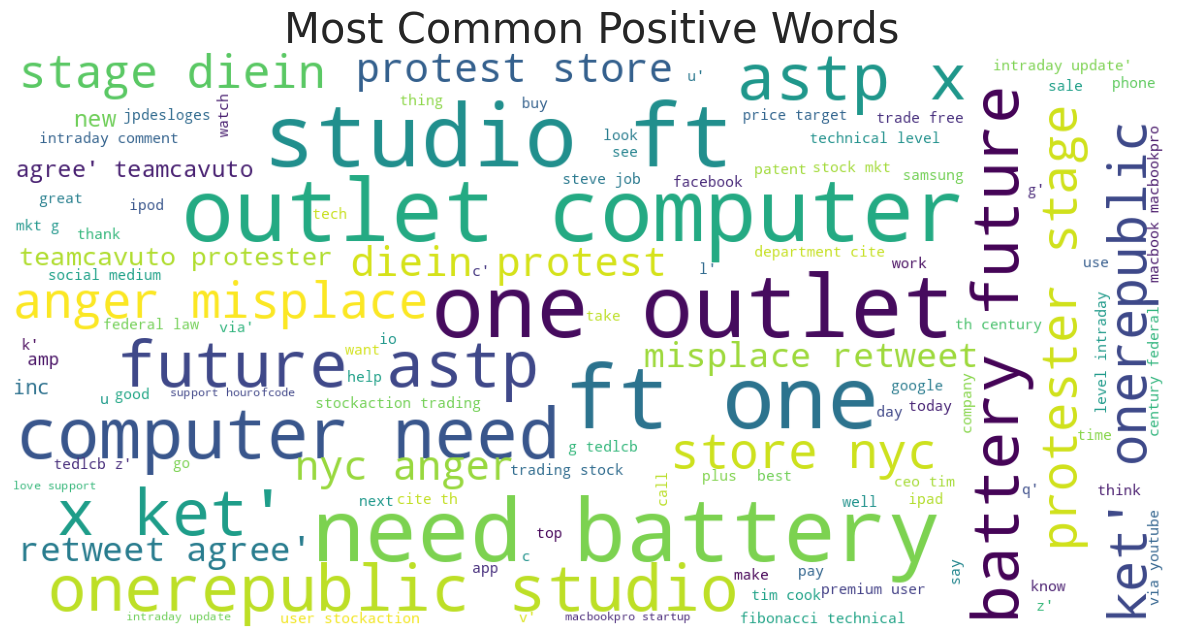

In [85]:
create_WordCloud(Positive_words, back_ground_color = "white", title = "Most Common Positive Words")

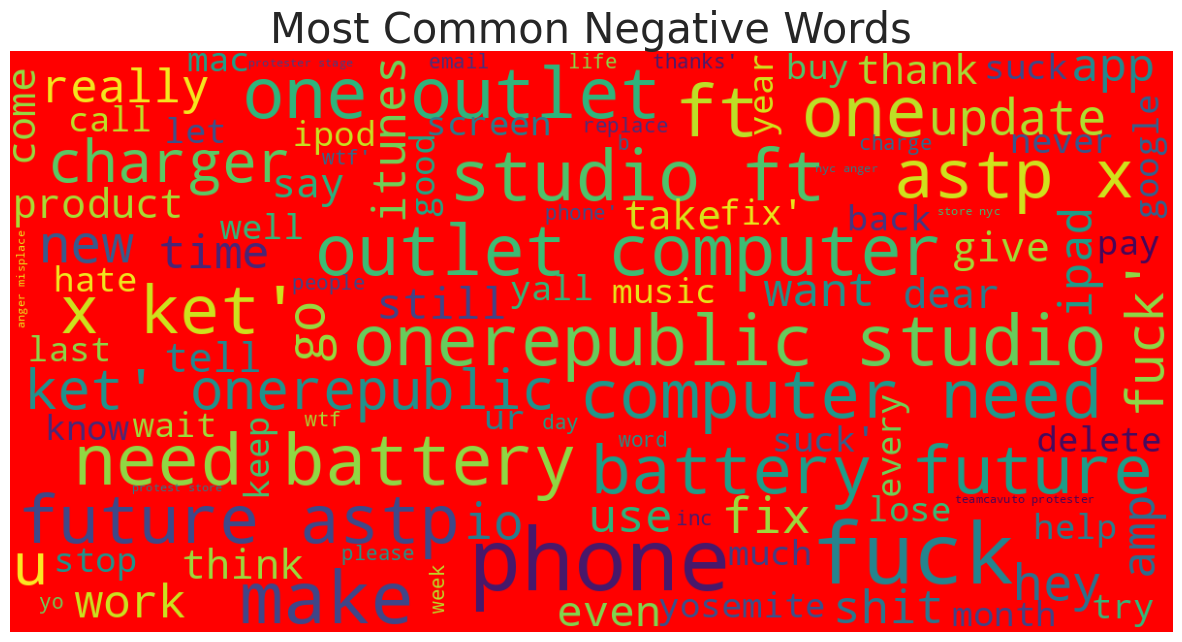

In [86]:
create_WordCloud(Negative_words, back_ground_color="red",title="Most Common Negative Words")

In [87]:
# Top 15 words are in positive reviews
freq_pos = nltk.FreqDist(Positive_words)
freq_pos.most_common(15)

[('onerepublic studio ft one outlet computer need battery future astp x ket',
  232),
 ('teamcavuto protester stage diein protest store nyc anger misplace retweet agree',
  138),
 ('fibonacci technical level intraday update', 23),
 ('shannonmmiller love support hourofcode workshop wp fnjnu', 19),
 ('thehill justice department cite th century federal law get unlock iphones eth qpaiom',
  16),
 ('', 16),
 ('intraday comment update range premium user stockaction trading stock mkt g tedlcb z',
  15),
 ('trade free nightly update post twitter visit trade free website u tkeapbxf',
  12),
 ('ceo tim cook come gay eufqqpmjj via posh net', 12),
 ('warm social medium hire social medium guru l finally tweet', 10),
 ('block trade detect', 8),
 ('hsmoghul autocorrect change muslim awesome okay', 8),
 ('swiftkey excite name app store best list year qlmti uf', 7),
 ('intraday comment pre open premium user stockaction trading stock mkt g tedlcb z',
  6),
 ('onerepublic', 6)]

In [88]:
# Top 15 words are in negative reviews
freq_neg=nltk.FreqDist(Negative_words)
freq_neg.most_common(10)

[('onerepublic studio ft one outlet computer need battery future astp x ket',
  71),
 ('fuck', 12),
 ('teamcavuto protester stage diein protest store nyc anger misplace retweet agree',
  12),
 ('cruci btch harry potter emojis please work', 7),
 ('block trade detect', 6),
 ('suck', 5),
 ('happy monday camera fancy plus suddenly stop work weekend instead meme', 5),
 ('ilovemymom try turn problem hysbbxpvz', 5),
 ('laura kate group message people', 4),
 ('', 4)]

#Task 8: Perform Data-Split

In [89]:
# split the data, train-test-split

x_train, x_test, y_train, y_test = train_test_split(data["text"], categories, stratify = categories, test_size = 0.20, random_state = 42)

In [90]:
#display the shapes of train and test data

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (3043,)
x_test shape: (761,)
y_train shape: (3043, 1)
y_test shape: (761, 1)


In [91]:
# Vectorization
# here we create new CountVectorizer, which will help us understand and count the words.
# and it has different ways to use it, but we will only use it with  2-3 gram
count_vec = CountVectorizer(ngram_range = (1,2))


In [92]:
# vectorizer to read the train text for us
# convert text data into a numerical format for machine learning models
x_train_features = count_vec.fit_transform(x_train)
x_train_features = x_train_features.toarray() # to get the frequency of the words

In [93]:
x_test_features = count_vec.transform(x_test)

In [94]:
# TF-IDF Vectorization, to convert text data into a TF-IDF (Term Frequency-Inverse Document Frequency) matrix.

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_Tfid = tfidf_vectorizer.fit_transform(x_train)
X_test_Tfid = tfidf_vectorizer.transform(x_test) # fit the vectorizer on the training data

#ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [95]:
X_train_Tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Task 9: Choose the ML Method to follow

In [96]:
# find the length of the largest sentence in training data
max_len = max(x_train, key = len)
print(f'Max number of words in a text in training data: {len(max_len)}')

Max number of words in a text in training data: 104


In [97]:
# Convert texts to padded sequences
max_words = 104
tokenizer = Tokenizer(num_words = max_words)

In [98]:
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(x_train)

In [99]:
# get the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(x_train)
xtest_seq = tokenizer.texts_to_sequences(x_test)

In [100]:
# padding the sequences
xtrain_pad = pad_sequences(xtrain_seq, maxlen=len(max_len), padding='post')
xtest_pad = pad_sequences(xtest_seq, maxlen=len(max_len), padding='post')
word_index = tokenizer.word_index

In [101]:
# get a random example
print('train review num 10:', x_train[9])
print('before padding:', xtrain_seq[9])
print('after padding:', xtrain_pad[9])

train review num 10: show make world biggest tech company
before padding: []
after padding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [102]:
# data shape after padding
print(xtrain_pad.shape)
print(xtest_pad.shape)
print(y_train.shape)
print(y_test.shape)

(3043, 104)
(761, 104)
(3043, 1)
(761, 1)


In [103]:
#create a sequential neural network model
def create_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Embedding(max_words, 100, input_length=max_words),
                                        tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, padding ='same', activation='relu'),
                                        tf.keras.layers.MaxPooling1D(pool_size = 2),
                                        tf.keras.layers.LSTM(256),
                                        tf.keras.layers.Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(3e-4), metrics=['accuracy'])
    return model

In [104]:
#display summary of the model architecture

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 104, 100)          10400     
                                                                 
 conv1d_1 (Conv1D)           (None, 104, 32)           6432      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 52, 32)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 256)               295936    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 313025 (1.19 MB)
Trainable params: 313025 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

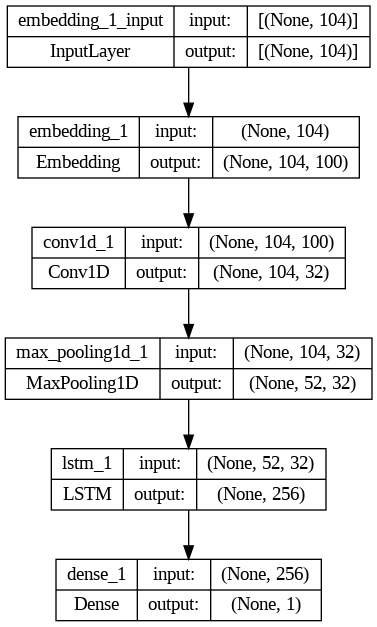

In [105]:
# print the block diagram of our model
plot_model(model, show_shapes = True, show_layer_names = True)

#Task 10: Train the ML Model

In [106]:
# create model checkpoint and callbacks to save the model weights when validation accuracy is maximum
callback=tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 2, mode = 'auto', baseline = None, restore_best_weights = True)

In [107]:
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device))

Found GPU at: /device:GPU:0


In [108]:
# fit the model
with tf.device('/device:GPU:0'):
  history = model.fit(xtrain_pad, y_train, validation_data=(xtest_pad, y_test), class_weight={0: 87, 1: 13}, epochs=100, batch_size=64)

Epoch 1/100
48/48 [==============================] - 6s 71ms/step - loss: 21.6475 - accuracy: 0.3204 - val_loss: 1.0642 - val_accuracy: 0.3206
Epoch 2/100
48/48 [==============================] - 1s 29ms/step - loss: 20.2954 - accuracy: 0.3204 - val_loss: 1.0287 - val_accuracy: 0.3206
Epoch 3/100
48/48 [==============================] - 1s 21ms/step - loss: 20.4210 - accuracy: 0.3204 - val_loss: 1.0130 - val_accuracy: 0.3206
Epoch 4/100
48/48 [==============================] - 1s 11ms/step - loss: 20.3280 - accuracy: 0.3204 - val_loss: 1.0753 - val_accuracy: 0.3206
Epoch 5/100
48/48 [==============================] - 1s 14ms/step - loss: 20.0094 - accuracy: 0.3355 - val_loss: 1.0509 - val_accuracy: 0.3482
Epoch 6/100
48/48 [==============================] - 0s 10ms/step - loss: 18.7218 - accuracy: 0.3782 - val_loss: 1.0279 - val_accuracy: 0.3206
Epoch 7/100
48/48 [==============================] - 1s 11ms/step - loss: 18.0956 - accuracy: 0.4555 - val_loss: 1.1013 - val_accuracy: 0.3811

In [109]:
# predict probabilities for test set
y_probs = model.predict(xtest_pad, verbose = 0)

In [110]:
# predict classes for test set
y_classes = (model.predict(xtest_pad) > 0.5).astype("int32")
y_train_pred=(model.predict(xtrain_pad) >= 0.5).astype("int32")

96/96 [==============================] - 0s 3ms/step


In [111]:
# Model evaluation
train_nn_results = model.evaluate(xtrain_pad, y_train, verbose=0)
test_nn_results = model.evaluate(xtest_pad, y_test, verbose=0)
print(f'Train accuracy: {train_nn_results[1]*100:0.2f}')
print(f'Test accuracy: {test_nn_results[1]*100:0.2f}')

Train accuracy: 71.38
Test accuracy: 62.68


In [112]:
#save the model

model.save('apple_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Task 11: Test the Model

In [113]:
#create 10 reviews to test the model, inclusing positive and negative reviews

review_1 = 'Apple sucks.'
review_2 = "I still love other brands more than Apple"
review_3 = "Disappointed with the battery life on my new Apple phone."
review_4 = "Apple's new design feels outdated compared to the competition."
review_5 = "Love it, best one ever!"
review_6 = "Apple's pricing is becoming unreasonable for the features offered."
review_7 = "Seriously impressed with Apple's customer service. Quick and efficient support when I needed it most. #HappyCustomer"
review_8 = "Trying out the latest Apple release. It's alright, nothing mind-blowing."
review_9 = "Awesome products."
review_10 = "Disappointed with the battery life!"

reviews = [review_1, review_2, review_3, review_4, review_5, review_6, review_7,review_8, review_9, review_10]


In [114]:
#use pre-trained model to predict sentiment (positive or negative)

results = {}
preds = []
def get_predictions(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequences
    model_= load_model("apple_model.h5")
    sequence = pad_sequences(sequence, maxlen = max_words)
    # get the prediction
    prediction = model_.predict(sequence)[0]
    if (np.round(prediction, 2) >= 0.5):
        pred = "Positive"
    else:
        pred = "Negative"
    return pred

In [115]:
for ind, review in enumerate(reviews):
    prediction = get_predictions(review)
    preds+=[prediction]
    results["CNN_LSTM_Model"] = preds

1/1 [==============================] - 0s 408ms/step


In [116]:
df_reviews = pd.DataFrame(reviews, index=["Review 1", "Review 2", "Review 3", "Review 4", "Review 5", "Review 6", "Review 7", "Review 8", "Review 9", "Review 10"])

display(HTML(df_reviews.to_html()))

df = pd.DataFrame.from_dict(results, orient ='index', columns = ["Review 1", "Review 2", "Review 3", "Review 4", "Review 5", "Review 6", "Review 7", "Review 8", "Review 9", "Review 10"])

df.style.set_table_styles([{"selector": ".row2,.row3,.row6", "props": [("border", "2px solid black"), ("color", "black"), ("background-color", "lightgreen")]},
                           {"selector": "thead", "props":"background-color:aqua; color:black; border:3px solid black;"}])

,0
Review 1,Apple sucks.
Review 2,I still love other brands more than Apple
Review 3,Disappointed with the battery life on my new Apple phone.
Review 4,Apple's new design feels outdated compared to the competition.
Review 5,"Love it, best one ever!"
Review 6,Apple's pricing is becoming unreasonable for the features offered.
Review 7,Seriously impressed with Apple's customer service. Quick and efficient support when I needed it most. #HappyCustomer
Review 8,"Trying out the latest Apple release. It's alright, nothing mind-blowing."
Review 9,Awesome products.
Review 10,Disappointed with the battery life!


,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10
CNN_LSTM_Model,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative


After running all the code, all predictions turned out to be negative. However, evidently, there are positive reviews within my test set. The training accuracy stands at 71.38%, and the test accuracy is 62.68%, but these values are not satisfactorily high.

I attempted to increase the number of epochs from 10 to 50 and then to 100. However, it's uncertain whether more epochs directly lead to higher accuracy. I'm not entirely sure how to determine the optimal number of epochs. All I could do was trial and error to see how can I get the best accuracy from adjusting the epoch number.

Moreover, I believe another approach to potentially enhance accuracy is by augmenting the model's complexity with additional layers to facilitate better training. I looked up many notebooks from google reaserch, yet, I'm still uncertain about the process of adding and adjusting layers to create an optimal model structure.

Initially, I intended to categorize sentiments into three labels: positive, neutral, and negative—the original labels in this dataset. However, due to a lack of understanding on implementing three labels within this workflow, I combined neutral and positive sentiments into a single 'positive' label. This could be a reason why achieving high accuracy has been challenging.

Additionally, I consider 'sentiment:confidence' a pivotal variable here. The numerical confidence level it represents should be considered to evaluate the reliability of the sentiment column.

Lastly, I'm contemplating the removal of certain irrelevant words such as 'apple', 'co', 'http', 'aapl', etc. These words have high frequency in the text but might not significantly contribute to defining whether the text is positive, negative, or neutral.